# Desafio Creditas - Data Science: Avaliação de Modelos

---

Predição da probabilidade que um cliente tem de ser enviado para análise de crédito dado que ele foi pré-aprovado para o empréstimo com garantia de automóvel.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carregando-dados-já-tratados" data-toc-modified-id="Carregando-dados-já-tratados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carregando dados já tratados</a></span><ul class="toc-item"><li><span><a href="#Execução-do-Pipeline-de-Modelagem-até-a-geração-de-novas-features" data-toc-modified-id="Execução-do-Pipeline-de-Modelagem-até-a-geração-de-novas-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Execução do Pipeline de Modelagem até a geração de novas features</a></span></li><li><span><a href="#Carregamento-dos-dados-de-treinamento-e-teste" data-toc-modified-id="Carregamento-dos-dados-de-treinamento-e-teste-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Carregamento dos dados de treinamento e teste</a></span></li></ul></li><li><span><a href="#Seleção-de-Modelos" data-toc-modified-id="Seleção-de-Modelos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seleção de Modelos</a></span><ul class="toc-item"><li><span><a href="#Objetivo:" data-toc-modified-id="Objetivo:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Objetivo:</a></span></li><li><span><a href="#Modelos-de-Classificação-Escolhidos-para-teste:" data-toc-modified-id="Modelos-de-Classificação-Escolhidos-para-teste:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Modelos de Classificação Escolhidos para teste:</a></span></li></ul></li><li><span><a href="#Avaliação-dos-Modelos" data-toc-modified-id="Avaliação-dos-Modelos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Avaliação dos Modelos</a></span><ul class="toc-item"><li><span><a href="#Randon-Forest-Classifier" data-toc-modified-id="Randon-Forest-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Randon Forest Classifier</a></span></li><li><span><a href="#Gradient-Boost-Classifier" data-toc-modified-id="Gradient-Boost-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gradient Boost Classifier</a></span></li><li><span><a href="#Multilayer-Perceptron-Classifier" data-toc-modified-id="Multilayer-Perceptron-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Multilayer Perceptron Classifier</a></span></li></ul></li><li><span><a href="#Curva-ROC" data-toc-modified-id="Curva-ROC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Curva ROC</a></span></li><li><span><a href="#Escolha-dos-Hiperparametros-do-Modelo" data-toc-modified-id="Escolha-dos-Hiperparametros-do-Modelo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Escolha dos Hiperparametros do Modelo</a></span><ul class="toc-item"><li><span><a href="#Complexidade-do-Modelo" data-toc-modified-id="Complexidade-do-Modelo-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Complexidade do Modelo</a></span></li></ul></li><li><span><a href="#Outros-Detalhes" data-toc-modified-id="Outros-Detalhes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outros Detalhes</a></span><ul class="toc-item"><li><span><a href="#Tratamento-de-Outliers" data-toc-modified-id="Tratamento-de-Outliers-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tratamento de Outliers</a></span></li><li><span><a href="#Tratamento-de-Dados-Categóricos" data-toc-modified-id="Tratamento-de-Dados-Categóricos-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tratamento de Dados Categóricos</a></span></li><li><span><a href="#Geração-de-novas-características-a-partir-de-relações" data-toc-modified-id="Geração-de-novas-características-a-partir-de-relações-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Geração de novas características a partir de relações</a></span></li><li><span><a href="#Seleção-das-melhores-features-para-o-modelo" data-toc-modified-id="Seleção-das-melhores-features-para-o-modelo-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Seleção das melhores features para o modelo</a></span></li></ul></li></ul></div>

## Carregando dados já tratados

### Execução do Pipeline de Modelagem até a geração de novas features

In [1]:
%run scripts/load_data.py
%run scripts/preprocessing.py
%run scripts/feature_generation.py

### Carregamento dos dados de treinamento e teste

Com os dados já tratados e separados pela execução do *pipeline*, basta importar os dados necessários para o teste dos modelos:

- `X_train.pkl`: Features já préprocessadas, sem *outliers*, com dados já normalizados e binarizados (no caso de categorias);
- `balanced_y_train.pkl`: Variável alvo com tratamento de dados desbalanceados;
- `X_test.pkl`: Features selecionadas para teste do modelo;
- `y_test.pkl`: Variável alvo, sem tratamento de dados desbalanceados, para teste do modelo.


In [2]:
import pandas as pd
from sklearn.externals import joblib

X_train = joblib.load("model_files/X_train.pkl")
y_train = joblib.load("model_files/balanced_y_train.pkl")
X_test = joblib.load("model_files/X_test.pkl")
y_test = joblib.load("model_files/y_test.pkl")


## Seleção de Modelos

### Objetivo:

Encontrar o modelo mais adequado, baseado em métricas de desempenho, para abordar o problema proposto. 

### Modelos de Classificação Escolhidos para teste:
- Randon Forest;
- Gradient Boost;
- Multilayer Perceptron Classifier.



## Avaliação dos Modelos

Aqui vamos realizar o treinamento e teste dos modelos citados, com parâmetros padrões, para avaliar as métricas de validação de todos. 
As métricas utilizadas são:

- Validação Cruzada;
- Matriz de Confusão (juntamente com as taxas de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos);
- Avaliação da Curva ROC e área sobre a curva ROC;

E, para o modelo escolhido, será feito um estudo da **acurácia do modelo em função da complexidade** (número de features), afim de evitar *overfitting*. Para este modelo, também será feito uma avaliação da curva de aprendizado. 


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Randon Forest Classifier

- Algorítmo do tipo *ensemble*: gera multiplos classificadores considerados "fracos" (no caso, arvores de decisão) e combina seus resultados, obtendo um classificador que apresenta maior acurácia do que cada árvore de decisão sozinha.


In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier().fit(X_train, y_train)

scores = cross_val_score(rfc_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/mbranbilla/.pyenv/versions/3.7.1/envs/default_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.91 (+/- 0.01)


Para avaliar a distribuição das probabilidades das classes preditas, utiliza-se de um histograma.

Text(0.5, 0, 'Probability')

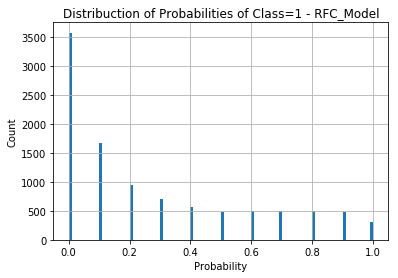

In [25]:
predict_prob = pd.DataFrame(rfc_model.predict_proba(X_test.values))

predict_prob.iloc[:, 1].hist(bins=100)
plt.title("Distribuction of Probabilities of Class=1 - RFC_Model")
plt.ylabel("Count")
plt.xlabel("Probability")

In [108]:
scores_rfc = pd.DataFrame(columns=["true_values", "predict_values", "scores"])

scores_rfc['true_values'] = y_test
scores_rfc['predict_values'] = rfc_model.predict(X_test)
scores_rfc["scores"] = [x[1] for x in rfc_model.predict_proba(X_test)]

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, scores_rfc['scores'].values)

auc_score_rfc = roc_auc_score(y_test, scores_rfc['scores'].values)

### Gradient Boost Classifier

Este classificador também é um método *ensemble*, ou seja, utiliza-se da combinação do resultado de um conjunto de classificadores mais simples. Porém, neste caso, o erro de um dos classificadores deste conjunto é ajustado pelo classificador anterior. Assim, este é um método que apresenta ótimos resultados (principalmente em competições do Kaggle), principalmente por ser bem robusto contra *overfitting*.

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier().fit(X_train, y_train)

scores = cross_val_score(gbc_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.01)


#### Calculo da curva ROC e da área sob a curva ROC

Text(0.5, 0, 'Probability')

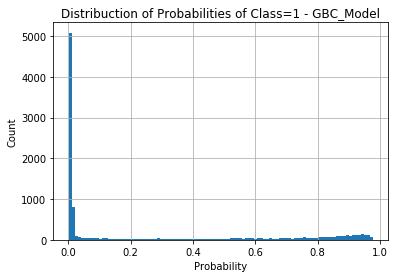

In [110]:
predict_prob = pd.DataFrame(gbc_model.predict_proba(X_test.values))

predict_prob.iloc[:, 1].hist(bins=100)
plt.title("Distribuction of Probabilities of Class=1 - GBC_Model")
plt.ylabel("Count")
plt.xlabel("Probability")

#### Matriz de Confusão


Text(0.5, 1.0, 'Confusion Matrix = RandomForestClassifier')

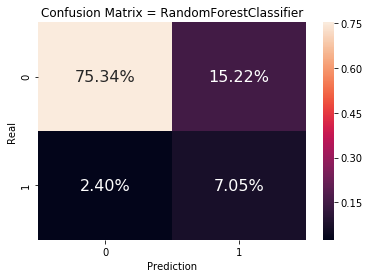

In [127]:
cnf_matrix_rfc = confusion_matrix(y_test, scores_rfc['predict_values']) / len(X_test)

sns.heatmap(cnf_matrix_rfc, annot=True, annot_kws={"size": 16}, fmt='.2%')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix = RandomForestClassifier')

#### Calculo da curva ROC e da área sob a curva ROC

In [128]:
scores_gbc = pd.DataFrame(columns=["true_values", "predict_values", "scores"])

scores_gbc['true_values'] = y_test
scores_gbc['predict_values'] = gbc_model.predict(X_test)
scores_gbc["scores"] = [x[1] for x in gbc_model.predict_proba(X_test)]

fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, scores_gbc['scores'].values)

auc_score_gbc = roc_auc_score(y_test, scores_gbc['scores'].values)


#### Matriz de Confusão

Text(0.5, 1.0, 'Confusion Matrix = GradientBoostingClassifier')

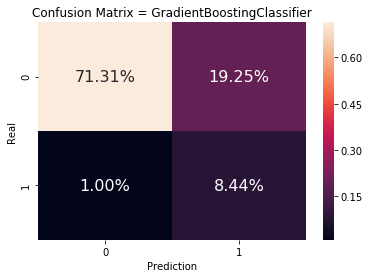

In [126]:
cnf_matrix_gbc = confusion_matrix(y_test, scores_gbc['predict_values']) / len(X_test)

sns.heatmap(cnf_matrix_gbc, annot=True, annot_kws={"size": 16}, fmt='.2%')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix = GradientBoostingClassifier')

### Multilayer Perceptron Classifier

In [6]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier().fit(X_train, y_train)

scores = cross_val_score(gbc_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.01)


Text(0.5, 0, 'Probability')

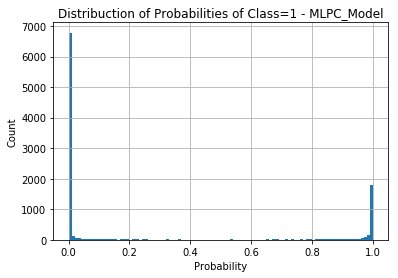

In [27]:
predict_prob = pd.DataFrame(mlpc_model.predict_proba(X_test.values))

predict_prob.iloc[:, 1].hist(bins=100)
plt.title("Distribuction of Probabilities of Class=1 - MLPC_Model")
plt.ylabel("Count")
plt.xlabel("Probability")

#### Calculo da curva ROC e da área sob a curva ROC


In [124]:
scores_mlpc = pd.DataFrame(columns=["true_values", "predict_values", "scores"])

scores_mlpc['true_values'] = y_test
scores_mlpc['predict_values'] = mlpc_model.predict(X_test)
scores_mlpc["scores"] = [x[1] for x in mlpc_model.predict_proba(X_test)]

fpr_mlpc, tpr_mlpc, thresholds_mlpc = roc_curve(y_test, scores_mlpc['scores'].values)

auc_score_mlpc = roc_auc_score(y_test, scores_mlpc['scores'].values)

#### Matriz de Confusão

Text(0.5, 1.0, 'Confusion Matrix = MLPClassifier')

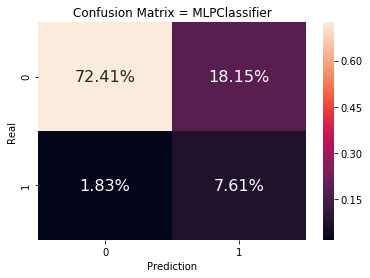

In [125]:
cnf_matrix_mlpc = confusion_matrix(y_test, scores_mlpc['predict_values']) / len(X_test)

sns.heatmap(cnf_matrix_mlpc, annot=True, annot_kws={"size": 16}, fmt='.2%')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix = MLPClassifier')

## Curva ROC

Text(0.5, 0, 'False Positive Rate (Acuracy)')

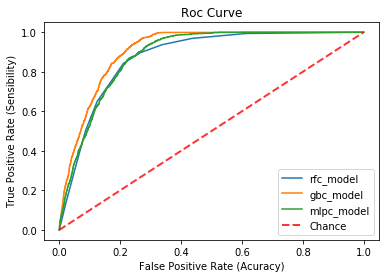

In [106]:
plt.plot(fpr_rfc, tpr_rfc, label="rfc_model")
plt.plot(fpr_gbc, tpr_gbc, label="gbc_model")
plt.plot(fpr_mlpc, tpr_mlpc, label="mlpc_model")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.legend()
plt.title("Roc Curve")
plt.ylabel("True Positive Rate (Sensibility)")
plt.xlabel("False Positive Rate (Acuracy)")

Da análise da Curva ROC, o classificador baseado em *GradientBoost* apresentou o melhor comportamento - ou seja, foi o classificador cujo sua curva ROC mostrou-se mais distante da linha diagonal, que representa um classificador "ao acaso" (com 50% de chance de acertividade).

Isso pode ser visualizado pela área da curva ROC, uma vez que este classificador deverá apresentar a maior área. 

In [114]:
print("AUC metric for RandomForestClassifier: ", auc_score_rfc)
print("AUC metric for GradientBoostingClassifier: ", auc_score_gbc)
print("AUC metric for MLPClassifier: ", auc_score_mlpc)

AUC metric for RandomForestClassifier:  0.8754451731734422
AUC metric for GradientBoostingClassifier:  0.9087702208300792
AUC metric for MLPClassifier:  0.8846236315337179


## Escolha dos Hiperparametros do Modelo

Após encontrar o melhor modelo para o problema proposto, vamos selecionar os melhores parametros para o modelo, afim de torna-lo o mais acurado quanto for possível. 

Para isso, utilizamos a biblioteca `RandomizedSearchCV`, que realiza uma busca aleatória entre os parâmetros configurados de modo otimizado, utilizando-se do erro da simulação de um conjunto de parâmentros para ajustar a próxima simulação. 

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'max_features': [50, 100, 'auto'],
}

clf = RandomizedSearchCV(model, parameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'n_estimators': 150, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.05}
0.964 (+/-0.024) for {'n_estimators': 150, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.05}
0.949 (+/-0.005) for {'n_estimators': 100, 'max_features': 100, 'loss': 'exponential', 'learning_rate': 0.01}
0.933 (+/-0.135) for {'n_estimators': 100, 'max_features': 50, 'loss': 'exponential', 'learning_rate': 0.5}
0.954 (+/-0.006) for {'n_estimators': 200, 'max_features': 'auto', 'loss': 'exponential', 'learning_rate': 0.01}
0.937 (+/-0.119) for {'n_estimators': 200, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.1}
0.943 (+/-0.103) for {'n_estimators': 50, 'max_features': 50, 'loss': 'deviance', 'learning_rate': 0.5}
0.962 (+/-0.016) for {'n_estimators': 10, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.5}
0.957 (+/-0.004) for {'n_estimators': 200, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.01}
0.964 (+/-0.012

Assim, o melhor conjunto de parametros a ser utilizado no modelo foi:

```
{
    'n_estimators': 100,
    'max_features': 50,
    'loss': 'exponential',
    'learning_rate': 0.05
}
```

Apresentando uma acurácia de `96,5%`.

## Outros Detalhes

### Tratamento de Outliers

Para cada característica numérica, foram excluídos valores que superam a média em mais que três desvios padrões. 

### Tratamento de Dados Categóricos

Foi realizado um *encoding* de variáveis categóricas para uma representação binária. Cara categoria foi transcrita para um número binário. Para variáveis que apresentam um número elevado de categorias (como `city`), esse processo mostra-se mais robusto contra o problema de dimensionalidade do que outros, tal como o método `one-hot encoding`. 

### Geração de novas características a partir de relações

Foi utilizado o pacote `sklearn.preprocessing.PolynomialFeatures` para gerar relações polinomiais de até segunda ordem entre as características numéricas. Isso contribui para que os algorítimos de machine learning encontrem mais facilmente relações secundárias, não lineares, entre as características.

### Seleção das melhores features para o modelo

Durante o pipeline de treinamento, as características disponíveis são avaliadas segundo sua importância, que é determinada pelo valor F da análise de variância (F-Value of ANOVA). 

O nome das variáveis e sua importância são exportadas para serem utilizadas no processo de treinamento. 